## TP4: Clustering 

In [220]:
import pandas as pd
data = pd.read_csv(r'C:\Users\oki\Desktop\OnlineRetail.csv', encoding='latin1',nrows=5000)   
df = pd.DataFrame(data, columns=['CustomerID','UnitPrice','Quantity','InvoiceDate'])
print(df)

      CustomerID  UnitPrice  Quantity       InvoiceDate
0        17850.0       2.55         6  01-12-2010 08:26
1        17850.0       3.39         6  01-12-2010 08:26
2        17850.0       2.75         8  01-12-2010 08:26
3        17850.0       3.39         6  01-12-2010 08:26
4        17850.0       3.39         6  01-12-2010 08:26
...          ...        ...       ...               ...
4995     18168.0      10.95         2  02-12-2010 18:08
4996     18168.0       2.55         2  02-12-2010 18:08
4997     18168.0       4.95         3  02-12-2010 18:08
4998     18168.0       1.65         2  02-12-2010 18:08
4999     18168.0       0.85         2  02-12-2010 18:08

[5000 rows x 4 columns]


# Frequency :

In [221]:
Frequency= df.groupby(['CustomerID']).count()
print(Frequency)

            UnitPrice  Quantity  InvoiceDate
CustomerID                                  
12431.0            14        14           14
12433.0            73        73           73
12471.0             1         1            1
12472.0            14        14           14
12583.0            20        20           20
...               ...       ...          ...
18085.0             9         9            9
18144.0             3         3            3
18168.0            14        14           14
18229.0             7         7            7
18239.0            29        29           29

[197 rows x 3 columns]


## Monetary: 

In [222]:
df['multiplied_column'] = df['UnitPrice'] * df['Quantity']
print(df)

      CustomerID  UnitPrice  Quantity       InvoiceDate  multiplied_column
0        17850.0       2.55         6  01-12-2010 08:26              15.30
1        17850.0       3.39         6  01-12-2010 08:26              20.34
2        17850.0       2.75         8  01-12-2010 08:26              22.00
3        17850.0       3.39         6  01-12-2010 08:26              20.34
4        17850.0       3.39         6  01-12-2010 08:26              20.34
...          ...        ...       ...               ...                ...
4995     18168.0      10.95         2  02-12-2010 18:08              21.90
4996     18168.0       2.55         2  02-12-2010 18:08               5.10
4997     18168.0       4.95         3  02-12-2010 18:08              14.85
4998     18168.0       1.65         2  02-12-2010 18:08               3.30
4999     18168.0       0.85         2  02-12-2010 18:08               1.70

[5000 rows x 5 columns]


In [223]:
Monetary=df.groupby('CustomerID')['multiplied_column'].sum().reset_index()
Monetary.columns = ['CustomerID', 'Monetary']
print(Monetary)

     CustomerID  Monetary
0       12431.0    358.25
1       12433.0   1919.14
2       12471.0    -17.00
3       12472.0   -122.30
4       12583.0    855.86
..          ...       ...
192     18085.0    303.90
193     18144.0    165.05
194     18168.0    139.60
195     18229.0    344.20
196     18239.0    438.10

[197 rows x 2 columns]


## Recency:

In [224]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
# Group by 'CustomerID' and get the maximum 'InvoiceDate' for each customer
grouped_df = df.groupby('CustomerID')['InvoiceDate'].max().reset_index()
df['Recency'] = (grouped_df['InvoiceDate'].max() - grouped_df['InvoiceDate']).dt.days
print(df)

      CustomerID  UnitPrice  Quantity         InvoiceDate  multiplied_column  \
0        17850.0       2.55         6 2010-01-12 08:26:00              15.30   
1        17850.0       3.39         6 2010-01-12 08:26:00              20.34   
2        17850.0       2.75         8 2010-01-12 08:26:00              22.00   
3        17850.0       3.39         6 2010-01-12 08:26:00              20.34   
4        17850.0       3.39         6 2010-01-12 08:26:00              20.34   
...          ...        ...       ...                 ...                ...   
4995     18168.0      10.95         2 2010-02-12 18:08:00              21.90   
4996     18168.0       2.55         2 2010-02-12 18:08:00               5.10   
4997     18168.0       4.95         3 2010-02-12 18:08:00              14.85   
4998     18168.0       1.65         2 2010-02-12 18:08:00               3.30   
4999     18168.0       0.85         2 2010-02-12 18:08:00               1.70   

      Recency  
0        31.0  
1      

## un algorithme de clustering hiérarchique :

In [225]:

# Calculate frequency
data = df.groupby('CustomerID')['InvoiceDate'].count().reset_index()
data.columns = ['CustomerID', 'Frequency']

# Calculate recency
grouped_df = df.groupby('CustomerID')['InvoiceDate'].max().reset_index()
grouped_df['Recency'] = (grouped_df['InvoiceDate'].max() - grouped_df['InvoiceDate']).dt.days

# Combine frequency and recency
data['Recency'] =grouped_df['Recency']
#calculate Monetary
data['monetary']=Monetary['Monetary']

print(data)


     CustomerID  Frequency  Recency  monetary
0       12431.0         14       31    358.25
1       12433.0         73       31   1919.14
2       12471.0          1        0    -17.00
3       12472.0         14       31   -122.30
4       12583.0         20       31    855.86
..          ...        ...      ...       ...
192     18085.0          9       31    303.90
193     18144.0          3       31    165.05
194     18168.0         14        0    139.60
195     18229.0          7       31    344.20
196     18239.0         29        0    438.10

[197 rows x 4 columns]


In [227]:
data.dropna(subset=['Recency'], inplace=True)
print(data)

     CustomerID  Frequency  Recency  monetary
0       12431.0         14       31    358.25
1       12433.0         73       31   1919.14
2       12471.0          1        0    -17.00
3       12472.0         14       31   -122.30
4       12583.0         20       31    855.86
..          ...        ...      ...       ...
192     18085.0          9       31    303.90
193     18144.0          3       31    165.05
194     18168.0         14        0    139.60
195     18229.0          7       31    344.20
196     18239.0         29        0    438.10

[197 rows x 4 columns]


In [231]:
X = data.iloc[:, [1,2,3]].values
X

array([[ 1.40000e+01,  3.10000e+01,  3.58250e+02],
       [ 7.30000e+01,  3.10000e+01,  1.91914e+03],
       [ 1.00000e+00,  0.00000e+00, -1.70000e+01],
       [ 1.40000e+01,  3.10000e+01, -1.22300e+02],
       [ 2.00000e+01,  3.10000e+01,  8.55860e+02],
       [ 1.50000e+01,  3.10000e+01,  2.61480e+02],
       [ 2.00000e+00,  0.00000e+00,  9.20000e+00],
       [ 2.00000e+00,  3.10000e+01,  1.92600e+02],
       [ 5.90000e+01,  3.10000e+01,  3.90790e+02],
       [ 3.00000e+00,  0.00000e+00,  3.81000e+01],
       [ 1.20000e+01,  3.10000e+01,  2.03300e+02],
       [ 1.30000e+01,  0.00000e+00,  1.99650e+02],
       [ 1.50000e+01,  3.10000e+01,  3.22400e+02],
       [ 1.70000e+01,  3.10000e+01,  3.04040e+02],
       [ 5.00000e+00,  0.00000e+00,  4.51200e+01],
       [ 3.00000e+00,  0.00000e+00,  5.05500e+01],
       [ 1.70000e+01,  3.10000e+01,  3.66630e+02],
       [ 1.40000e+01,  3.10000e+01,  2.05860e+02],
       [ 4.00000e+00,  0.00000e+00,  1.60600e+02],
       [ 1.30000e+01,  3.10000e

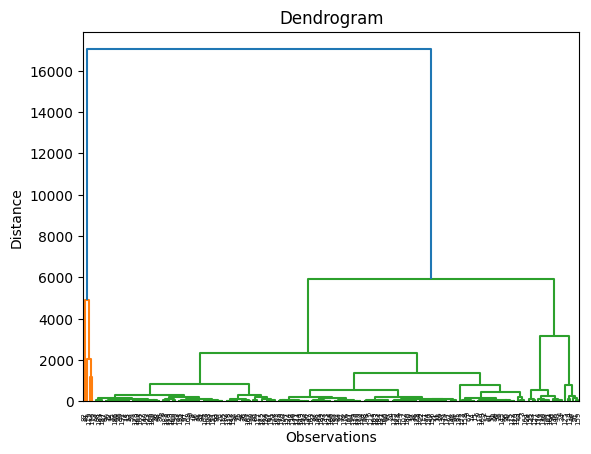

In [233]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
plt.show()

[[1.38384828e+04 1.27586207e+01 1.38965517e+01 4.26518276e+02]
 [1.68756522e+04 1.33043478e+01 1.48260870e+01 2.10642609e+02]
 [1.50610000e+04 7.30000000e+01 0.00000000e+00 9.40734000e+03]
 [1.57417632e+04 2.05000000e+01 1.22368421e+01 2.85326579e+02]
 [1.78082439e+04 2.25853659e+01 1.58780488e+01 2.85092927e+02]
 [1.69395000e+04 1.54500000e+02 0.00000000e+00 4.83136500e+03]
 [1.47000667e+04 1.75000000e+01 1.24000000e+01 2.21186000e+02]
 [1.64036000e+04 2.12000000e+01 1.24000000e+01 1.83890400e+03]
 [1.37770000e+04 3.30000000e+01 3.10000000e+01 6.58516000e+03]
 [1.29101852e+04 1.36296296e+01 1.60740741e+01 2.94175185e+02]]


C:\Users\oki\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


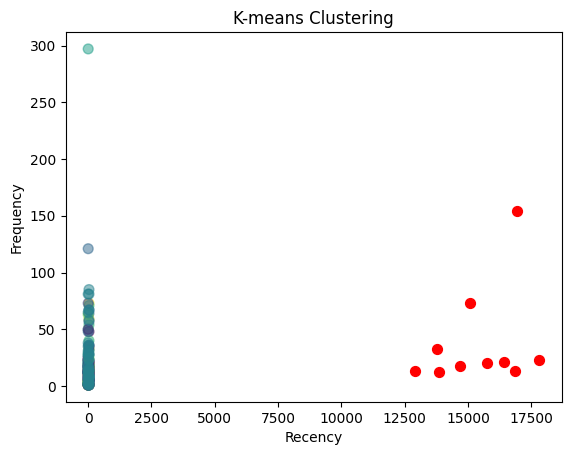

In [239]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Perform k-means clustering
kmeans = KMeans(n_clusters=10).fit(data)
centroids = kmeans.cluster_centers_
print(centroids)

# Plot the clusters
plt.scatter(data['Recency'], data['Frequency'], c=kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('K-means Clustering')
plt.show()